In [46]:
import json
import base64
import cv2
import numpy as np
import io
import rasterio as rio
from rasterio.plot import show

In [49]:
from matplotlib import pyplot

In [ ]:
f = open('../CHABUD/vectors/Original_Split-20230524T135331/MASK/metadata.json')
data = json.load(f)
train_list = data['dataset']['train']
val_list = data['dataset']['val']

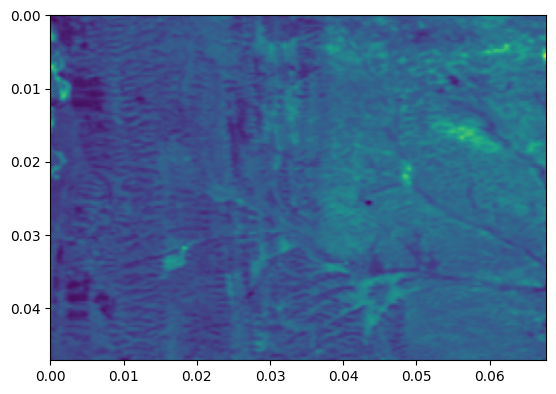

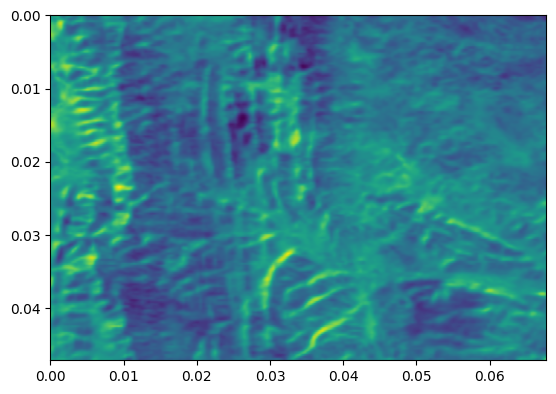

In [56]:
f = open(json_path)
data = json.load(f)
file = os.path.join('../',data["images"][0]["file_name"])

img_pre = rio.open(os.path.join('../',data["images"][0]["file_name"]))
show(img_pre)
img_post = rio.open(os.path.join('../',data["images"][1]["file_name"]))
show(img_post)
mask_string = os.path.join('../',data["properties"][0]["labels"][0])

# print(img_pre.shape)
# im1 = np.transpose(img_pre, (2,1,0))
# im1.shape

In [33]:
from skimage import transform

class Rescale_train(object):
    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, image):
        channels = image.shape[0]
        img = transform.resize(image, (channels, self.output_size, self.output_size))

        return img
    
scale = Rescale_train(256)
img = scale.__call__(img_pre)


In [35]:
img.shape

(12, 256, 256)

In [10]:
import os
json_paths = '../vectors/Original_Split-20230524T135331/MASK'

In [11]:
json_path = os.path.join(json_paths, train_list[0])
json_path

'../vectors/Original_Split-20230524T135331/MASK/012b8863-976c-44e1-a491-9adf19c1cbba_0.json'

In [12]:
data['images'][0]['file_name']

'rasters/raw/daa18714-d0dd-4a6b-8824-ea3819305e7d_22_pre.tif'

In [6]:
data['images'][1]['file_name']

'rasters/raw/daa18714-d0dd-4a6b-8824-ea3819305e7d_22_post.tif'

In [53]:

base64_decoded = base64.b64decode(data['properties'][0]['labels'][0])
image = Image.open(io.BytesIO(base64_decoded))
image_np = np.array(image)
image_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [49]:
cv2.imdecode(base64.b64decode(data['properties'][0]['labels'][0].encode()))

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'imdecode'
> Overload resolution failed:
>  - imdecode() missing required argument 'flags' (pos 2)
>  - imdecode() missing required argument 'flags' (pos 2)


In [10]:
import os
from PIL import Image
from torchvision.transforms import ToTensor

In [13]:
img_pre = Image.open(data['images'][0]['file_name'])
image = ToTensor()(image)

More samples per pixel than can be decoded: 12


UnidentifiedImageError: cannot identify image file 'rasters/raw/daa18714-d0dd-4a6b-8824-ea3819305e7d_22_pre.tif'

In [27]:
img_pre = rasterio.open('rasters/raw/ee00694d-3d15-4e5d-a627-5f4db851ff72_3_pre.tif').read()

img_pre

array([[[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        ...,
        [ 233,  240,  229, ...,  109,  123,  144],
        [ 271,  281,  259, ...,  120,  126,  135],
        [ 290,  300,  276, ...,  128,  119,  114]],

       [[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        ...,
        [ 394,  270,  249, ...,  169,   97,  209],
        [ 356,  309,  253, ...,  163,   83,  123],
        [ 575,  392,  291, ...,  248,  196,  194]],

       [[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        ...,
        [ 571,  433,  493, ...,  261,  221,  329],
        [ 497,  530,  480, ...,  305,  203,  233],
        [ 859,  648,  536, ...,  437,  347,  305]],

       ...,

       [[   0,    0,    

In [72]:
import rasterio
import glob
from skimage import transform

In [61]:
json_dir = '../CHABUD/vectors/Original_Split-20230524T135331/MASK'

In [80]:
img_pre = rasterio.open('../CHABUD/rasters/raw/058dcb9e-f349-40bf-868b-7afa8dc9bb5a_0_post.tif').read()
img = transform.resize(img_pre, (12,256, 256))
img.shape
img_pre.shape

(12, 356, 512)

In [81]:
import torch.nn as nn

In [ ]:
criterion = nn.CrossEntropyLoss

In [86]:
import bidate_model 